In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
auction_count = 100
MRP = 300
dutch_factor = 5

# <center> English Auction </center>

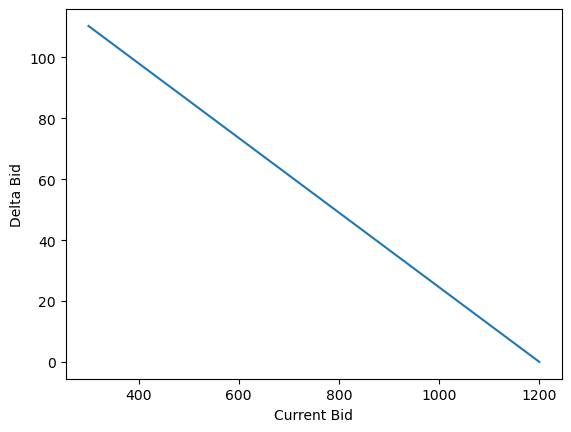

In [3]:
base_price = MRP

X = np.linspace(base_price,4*base_price,2*base_price)

def delta_bid(x):
    #return base_price*np.e**-(x/base_price)
    return (4*base_price-x)/(3*np.e)

plt.plot(X,delta_bid(X))
plt.ylabel("Delta Bid")
plt.xlabel("Current Bid")
plt.show()

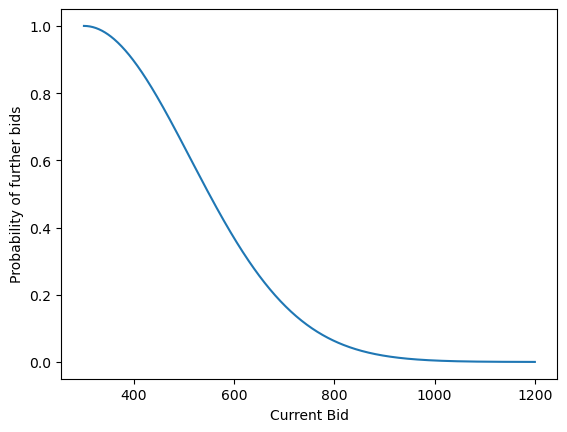

In [4]:
def probability_density(x):
    return np.e**(-((x-base_price)/base_price)**2)

plt.plot(X, probability_density(X))
plt.ylabel("Probability of further bids")
plt.xlabel("Current Bid")
plt.show()

In [5]:
final_bids = []
for auction in range(auction_count):
    bid = base_price
    while random.random()<=probability_density(bid):
        bid += delta_bid(bid)*(1+random.random())
    final_bids += [bid]

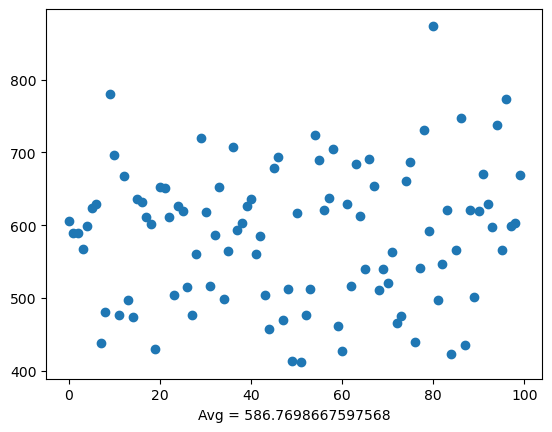

In [6]:
plt.scatter(range(auction_count), final_bids)
plt.xlabel(f"Avg = {sum(final_bids)/len(final_bids)}")
plt.show()

# <center> Dutch Auction </center>

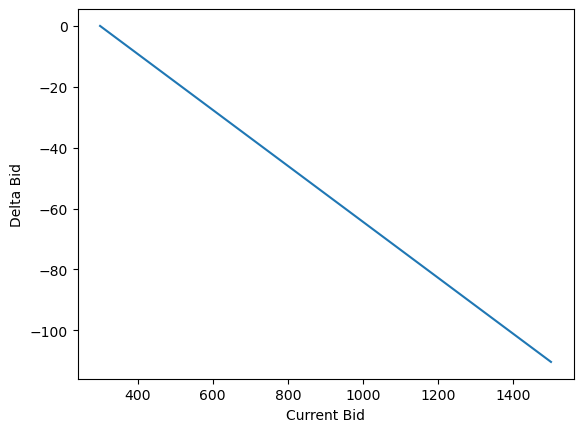

In [7]:
c = dutch_factor
base_price = dutch_factor*MRP

X = np.linspace(base_price//dutch_factor,base_price,base_price*2)

def delta_bid(x):
    #return 100/np.e*(1-np.e**(x/400))
    #return (base_price/4/np.e/(1-np.e**(-3/4)))*(-np.e**-((base_price-x)/base_price) + np.e**-(3/4))
   # return 100*((base_price-x)/((base_price-100)*np.e))-100/np.e
    return ((1/c)*base_price-x)/((c-1)*np.e)
plt.plot(X,delta_bid(X))
plt.ylabel("Delta Bid")
plt.xlabel("Current Bid")
plt.show()

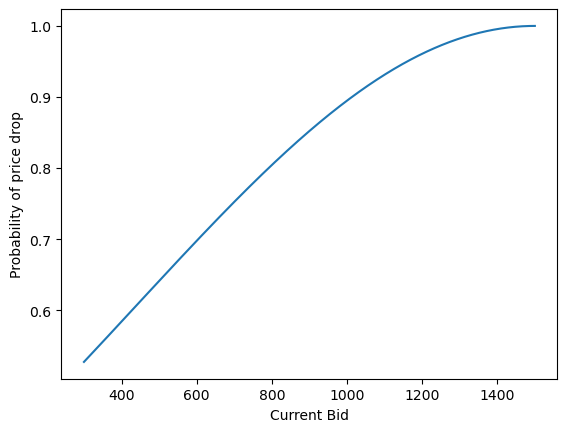

In [8]:
def probability_density(x):
    return np.e**(-((x-base_price)/base_price)**2)

plt.plot(X,probability_density(X))
plt.ylabel("Probability of price drop")
plt.xlabel("Current Bid")
plt.show()

In [9]:
final_bids = []
for auction in range(auction_count):
    bid = base_price
    while random.random()<=probability_density(bid):
        bid += delta_bid(bid)*(1+random.random())
    final_bids += [bid]

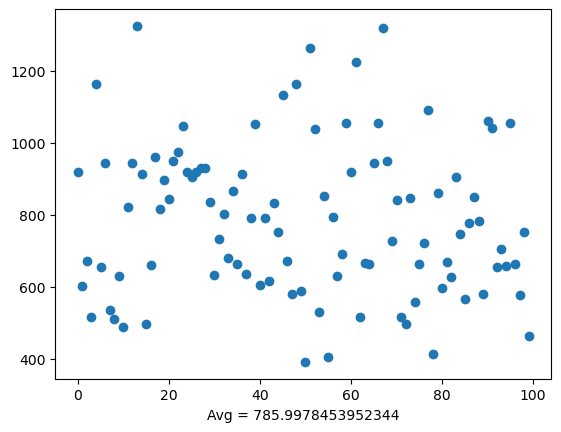

In [10]:
plt.scatter(range(auction_count), final_bids)

plt.xlabel(f"Avg = {sum(final_bids)/len(final_bids)}")
plt.show()